In [4]:
from pprint import pprint
import pandas as pd
import numpy as np

csv = pd.read_csv("movie_metadata.csv", engine="python")
movie_ratings = ["G", "PG", "PG-13", "R", "NC-17"]
training_set = csv
for column in training_set:
    training_set = training_set[training_set[column].notnull()]

In [5]:
del training_set["color"]
del training_set["director_name"]
del training_set["actor_2_name"]
del training_set["actor_1_name"]
del training_set["movie_title"]
del training_set["actor_3_name"]
del training_set["plot_keywords"]
del training_set["movie_imdb_link"]
del training_set["genres"]

training_set

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,392.0,156.0,0.0,4000.0,24000.0,336530303.0,383056,46055,0.0,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,324.0,100.0,15.0,284.0,799.0,200807262.0,294810,2036,1.0,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,635.0,141.0,0.0,19000.0,26000.0,458991599.0,462669,92000,4.0,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,375.0,153.0,282.0,10000.0,25000.0,301956980.0,321795,58753,3.0,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000
10,673.0,183.0,0.0,2000.0,15000.0,330249062.0,371639,24450,0.0,3018.0,English,USA,PG-13,250000000.0,2016.0,4000.0,6.9,2.35,197000


In [6]:
def listify(name, isList=False): # for example turns "USA" into [1.0,0.0,0.0,0.0...]
    all_items = list()
    new_items = list()
    if isList:
        for l in training_set[name]:
            for item in l:
                if item not in all_items:
                    all_items.append(item)

        for l in training_set[name]:
            items_for_movie = list()
            for item in all_items:
                items_for_movie.append(float(item in l))
            new_items.append(items_for_movie)
    else:
        for item in training_set[name]:
            if item not in all_items:
                all_items.append(item)

        for item in training_set[name]:
            items_for_movie = list()
            for check_item in all_items:
                items_for_movie.append(float(check_item==item))
            new_items.append(items_for_movie)
    return new_items

training_set["language"] = listify("language")
training_set["country"] = listify("country")
training_set["content_rating"] = listify("content_rating")

In [7]:
lenList = list()
flatFeatures = list()

for item in training_set.iloc[[1]].values[0]:
    try:
        lenList.append(len(item))
    except TypeError:
        lenList.append(1)

for index, row in training_set.iterrows():
    flatRow = list()
    for item in row:
        try:
            flatRow.extend(item)
        except TypeError:
            flatRow.append(item)
    flatFeatures.append(flatRow)

In [8]:
from sklearn import cluster as cl

kmeans = cl.KMeans(random_state=0).fit(flatFeatures)
dbscan = cl.DBSCAN().fit(flatFeatures)

print(np.histogram(dbscan.labels_))
print(list(dbscan.labels_).count(-1))

(array([   0,    0,    0,    0,    0, 3723,    0,    0,    0,    0]), array([-1.5, -1.4, -1.3, -1.2, -1.1, -1. , -0.9, -0.8, -0.7, -0.6, -0.5]))
3723


In [9]:
from sklearn.datasets import load_iris

iris = load_iris()
dbscan_test = cl.DBSCAN().fit(iris.data)

In [10]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [11]:
from collections import defaultdict
from unicodedata import normalize

import warnings #some models through randint warnings
warnings.filterwarnings("ignore")

def getLabels(toSearch, model=cl.DBSCAN(), plotModel=True, plotLabels=True):
    searchList = [[item.strip() for item in subset]
                    for subset in [x.split("=") 
                    for x in toSearch.split(",")]]
    model.fit(flatFeatures)
    labels = model.labels_
    retList = list()
    labelDictList=[]
    for key, value in searchList: #for every parameter
        indivList = list()
        movies = csv[csv[str(key)]==str(value)]
        indexes = list(movies.index)
        labelDict = {label:[] for label in list(
                set([labels[index] for index in indexes if index<len(labels)]))}
        for index in indexes:
            try:
                indivList.append(labels[index])
                labelDict[labels[index]].append( #adds movie title to labelDict
                    normalize("NFKD", csv.loc[[index]]["movie_title"].values[0]).strip())
            except IndexError:
                continue
        retList.append(indivList)
        labelDictList.append(labelDict)
    if plotModel:
        modelLabels = list(set(labels))
        counts = [list(labels).count(x) for x in modelLabels]
        D = {k:v for k, v in zip(modelLabels, counts)}
        plt.bar(range(len(D)), D.values(), align='center')
        plt.xticks(range(len(D)), D.keys())
        plt.ylabel('Number of Occurances')
        plt.title('Model Histogram')
        plt.show()
    if plotLabels:
        for ind, occurance in enumerate(retList):
            occuranceLabels = list(set(occurance))
            counts = [list(occurance).count(x) for x in occuranceLabels]
            D = {k:v for k, v in zip(occuranceLabels, counts)}
            plt.bar(range(len(D)), D.values(), align='center')
            plt.xticks(range(len(D)), D.keys())
            plt.ylabel('Number of Occurances')
            plt.title('Histogram for '+str(searchList[ind][1]))
            plt.show()
            pprint(labelDictList[ind])
    return retList
    #return labelDict

In [12]:
index_ref = dict((x,y) for x,y in zip(
        training_set.index.values, range(len(training_set.index))))

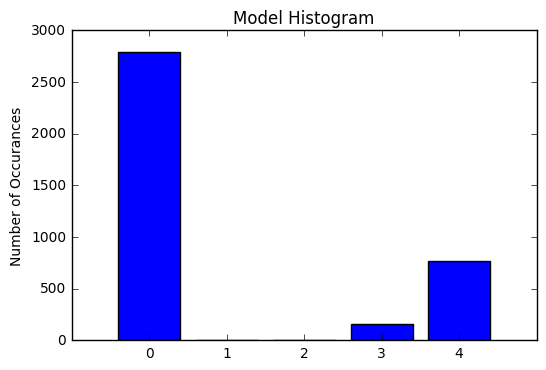

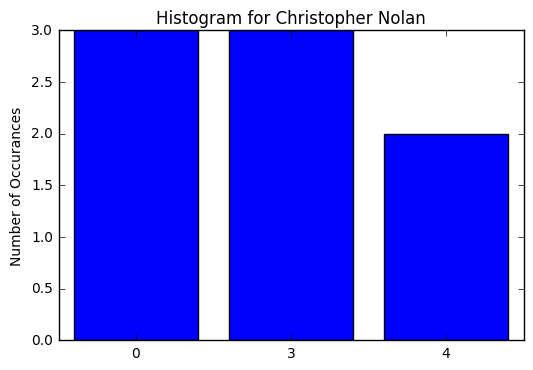

{0: ['Insomnia', 'The Prestige', 'Memento'],
 3: ['The Dark Knight Rises', 'The Dark Knight', 'Batman Begins'],
 4: ['Interstellar', 'Inception']}


[[3, 3, 4, 4, 3, 0, 0, 0]]

In [13]:
getLabels("director_name=Christopher Nolan",
          model=cl.KMeans(n_clusters=5))

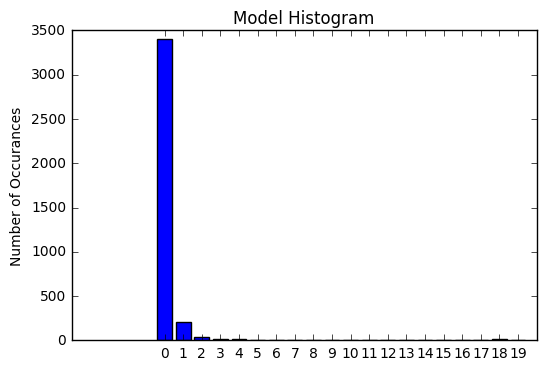

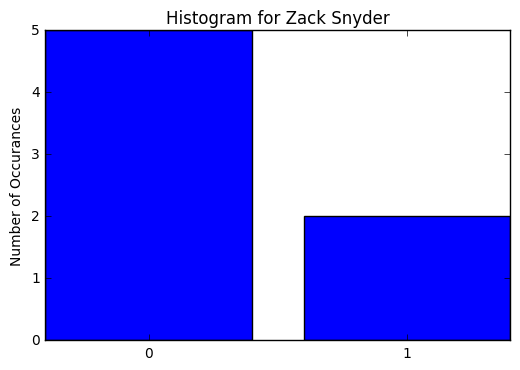

{0: ['Watchmen',
     "Legend of the Guardians: The Owls of Ga'Hoole",
     'Sucker Punch',
     '300',
     'Dawn of the Dead'],
 1: ['Batman v Superman: Dawn of Justice', 'Man of Steel']}


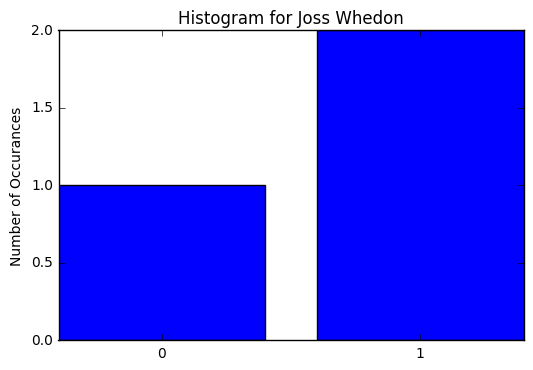

{0: ['Serenity'], 1: ['Avengers: Age of Ultron', 'The Avengers']}


[[1, 1, 0, 0, 0, 0, 0], [1, 1, 0]]

In [14]:
getLabels("director_name=Zack Snyder, director_name=Joss Whedon",
          model=cl.MeanShift())

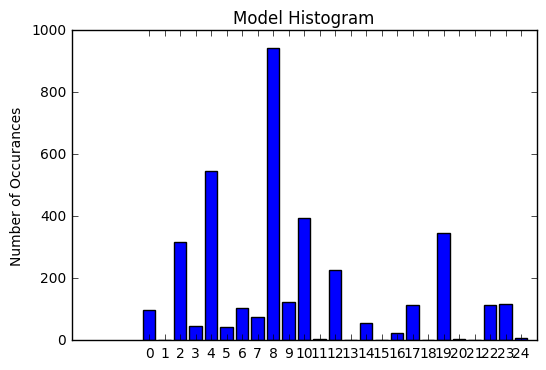

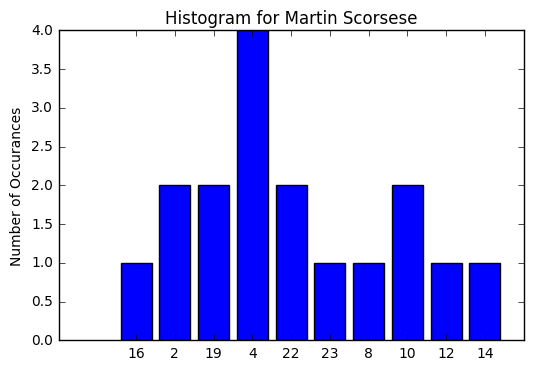

{2: ['The Wolf of Wall Street', 'Casino'],
 4: ['Mean Streets', 'Raging Bull', 'New York, New York', 'The Color of Money'],
 8: ['The Last Temptation of Christ'],
 10: ['Bringing Out the Dead', 'Kundun'],
 12: ['The Age of Innocence'],
 14: ['Hugo'],
 16: ['Gangs of New York'],
 19: ['Cape Fear', 'Goodfellas'],
 22: ['The Aviator', 'The Departed'],
 23: ['Shutter Island']}


[[14, 22, 2, 16, 22, 23, 2, 4, 19, 12, 10, 10, 19, 4, 4, 4, 8]]

In [15]:
getLabels("director_name=Martin Scorsese",cl.Birch(n_clusters=25))